In [2]:
# description: reproducing PDF for the wavelet coefficients given in Appendix A
# of Damiani's paper

# Therefore, we are using Damiani's convention for the wavelet transform without the
# division by a

import numpy as np
import sys, os
import _maps as maps
import _wavelets as wt

import healpy as hp
import astropy_healpix

import matplotlib.pyplot as plt
import matplotlib as mpl

from scipy.stats import norm, uniform
from scipy.integrate import quad

from tqdm import tqdm

In [3]:
# load scale parameter
a = 1

b = np.array([0,0])
b = b[np.newaxis,np.newaxis,:]

N_uni = 1000000
N_samples = 1

x_scale = 10
x_data = -0.5 * x_scale + np.sqrt(np.random.uniform(low = 0, high = (x_scale)**2., size = (N_uni,N_samples)))
y_data = np.random.uniform(low = -5., high = 5., size = (N_uni,N_samples))

# define 2d wavelet
wavelet_name = 'mexh'
mexh = wt._2d_wavelet(wavelet_name)

# pre-allocate wavelet coefficient map 
data = np.stack([x_data, y_data], axis = -1)
N_data, N_samples, N_dim = data.shape
print(data.shape)

buf_arr_arg =  ( (data - b ) / a )

# calculate wavelet coefficients
buf_mexh_output = mexh.base_fct(buf_arr_arg)

# estimate wavelet coefficient by summing over datapoints
buf_cwt = np.sum(buf_mexh_output, axis = -1) 

(1000000, 1, 2)


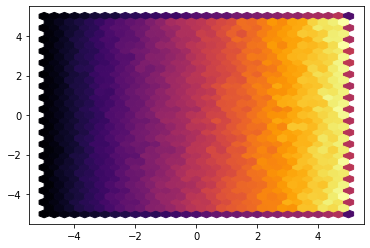

In [5]:
plt.hexbin(x_data, y_data, gridsize=30, cmap='inferno')

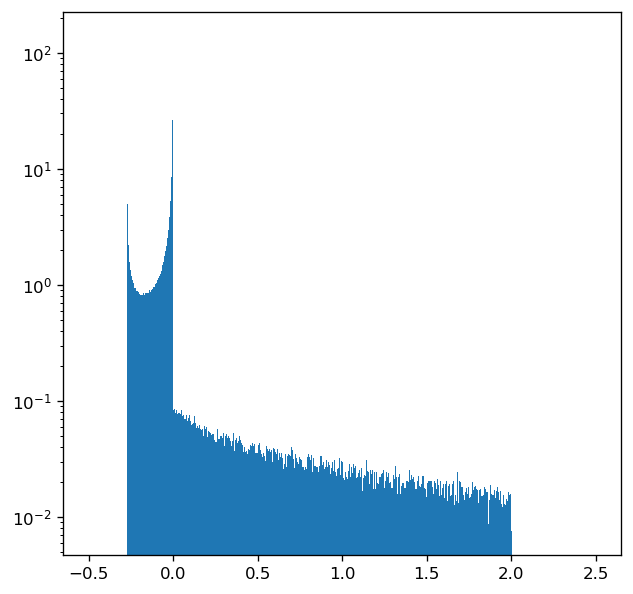

In [4]:
fig = plt.figure(figsize=(6, 6), dpi= 120)
ax = fig.add_subplot(111)
_, _, plot = ax.hist(buf_cwt, bins = np.linspace(-0.5,2.5,1000), density = True)
ax.set_yscale('log')

In [39]:
N_uni = 100000
N_samples = 1

x_scale = 10
x_data_1 = -0.5 * x_scale + np.sqrt(np.random.uniform(low = 0, high = (x_scale)**2., size = N_uni))
x_data_2 = np.random.uniform(low = -5., high = 5., size = N_uni)

x_data = np.zeros(N_uni)
f = 0.5
arr_bool = np.random.uniform(low = 0, high = 1, size = N_uni) <= f

x_data[arr_bool] = x_data_1[arr_bool]
x_data[~arr_bool] = x_data_2[~arr_bool]

In [40]:
print(x_data_1.shape)

(100000,)


(array([ 506.,  505.,  511.,  524.,  549.,  543.,  590.,  615.,  595.,
         569.,  609.,  590.,  676.,  650.,  643.,  675.,  629.,  651.,
         706.,  710.,  719.,  720.,  769.,  741.,  722.,  815.,  769.,
         775.,  777.,  816.,  790.,  811.,  849.,  824.,  836.,  947.,
         967.,  846.,  917.,  937.,  872.,  919.,  948.,  988.,  902.,
         920.,  977.,  972.,  976.,  992., 1017., 1087., 1049., 1017.,
        1076., 1099., 1080., 1052., 1116., 1142., 1161., 1191., 1176.,
        1166., 1170., 1206., 1193., 1234., 1220., 1204., 1143., 1258.,
        1255., 1270., 1294., 1330., 1282., 1314., 1291., 1252., 1321.,
        1422., 1267., 1320., 1406., 1358., 1417., 1404., 1395., 1355.,
        1403., 1408., 1474., 1475., 1454., 1479., 1469., 1492., 1477.]),
 array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
        -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
        -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859

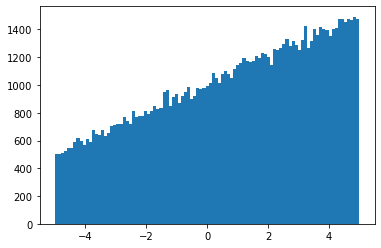

In [41]:
plt.hist(x_data_tot, bins = np.linspace(-5,5,100))

In [46]:
# load scale parameter
a = 1

b = np.array([0,0])
b = b[np.newaxis,np.newaxis,:]

N_uni = 1000000
N_samples = 1

x_scale = 10
x_data_1 = -0.5 * x_scale + np.sqrt(np.random.uniform(low = 0, high = (x_scale)**2., size = (N_uni,N_samples)))
x_data_2 = np.random.uniform(low = -5., high = 5., size = (N_uni,N_samples))

x_data = np.zeros((N_uni,N_samples))
f = 0.999
arr_bool = np.random.uniform(low = 0, high = 1, size = (N_uni,N_samples)) <= f

x_data[arr_bool] = x_data_1[arr_bool]
x_data[~arr_bool] = x_data_2[~arr_bool]

y_data = np.random.uniform(low = -5., high = 5., size = (N_uni,N_samples))

# define 2d wavelet
wavelet_name = 'mexh'
mexh = wt._2d_wavelet(wavelet_name)

# pre-allocate wavelet coefficient map 
data = np.stack([x_data, y_data], axis = -1)
N_data, N_samples, N_dim = data.shape
print(data.shape)

buf_arr_arg =  ( (data - b ) / a )

# calculate wavelet coefficients
buf_mexh_output = mexh.base_fct(buf_arr_arg)

# estimate wavelet coefficient by summing over datapoints
buf_cwt = np.sum(buf_mexh_output, axis = -1) 

(1000000, 1, 2)


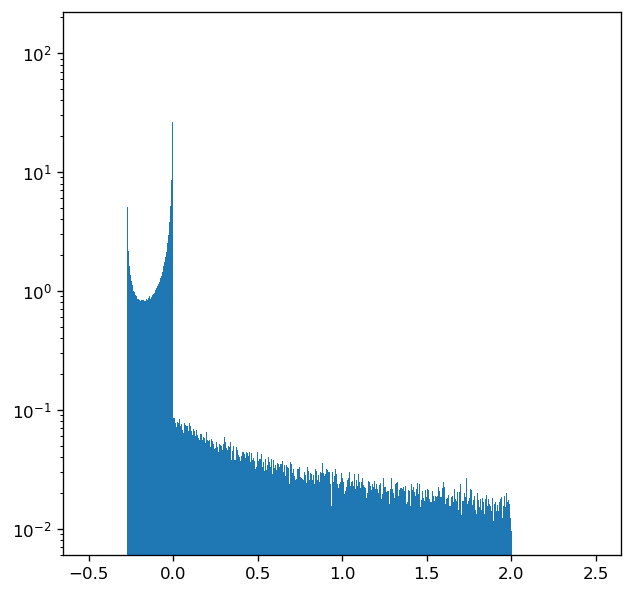

In [47]:
fig = plt.figure(figsize=(6, 6), dpi= 120)
ax = fig.add_subplot(111)
_, _, plot = ax.hist(buf_cwt, bins = np.linspace(-0.5,2.5,1000), density = True)
ax.set_yscale('log')

In [77]:
# load scale parameter
a = 1

b = np.array([0,0])
b = b[np.newaxis,np.newaxis,:]

N_uni = 10000
N_samples = 1000
N_f = 20
f_arr = np.linspace(0,1,N_f)

x_scale = 10
x_data_1 = -0.5 * x_scale + np.sqrt(np.random.uniform(low = 0, high = (x_scale)**2., size = (N_uni,N_samples, N_f)))
x_data_2 = np.random.uniform(low = -5., high = 5., size = (N_uni,N_samples,N_f))

x_data = np.zeros((N_uni,N_samples,N_f))

arr_bool = np.empty((N_uni,N_samples,N_f), dtype = bool)
for n in range(N_f):    
    arr_bool[:,:,n] = (np.random.uniform(low = 0, high = 1, size = (N_uni,N_samples)) <= f)

x_data[arr_bool] = x_data_1[arr_bool]
x_data[~arr_bool] = x_data_2[~arr_bool]

y_data = np.random.uniform(low = -5., high = 5., size = (N_uni,N_samples,N_f))

# define 2d wavelet
wavelet_name = 'mexh'
mexh = wt._2d_wavelet(wavelet_name)

# pre-allocate wavelet coefficient map 
data = np.stack([x_data, y_data], axis = -1)
N_data, N_samples, N_f, N_dim = data.shape
print(data.shape)

buf_arr_arg =  ( (data - b ) / a )

# calculate wavelet coefficients
buf_mexh_output = mexh.base_fct(buf_arr_arg)

# estimate wavelet coefficient by summing over datapoints
buf_cwt = np.sum(buf_mexh_output, axis = -2) 

(10000, 1000, 20, 2)


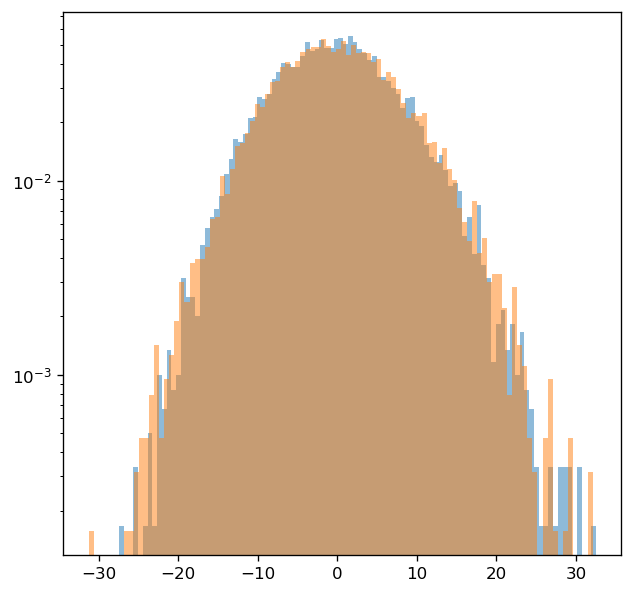

In [80]:
fig = plt.figure(figsize=(6, 6), dpi= 120)
ax = fig.add_subplot(111)
_, _, plot = ax.hist(buf_cwt[:,0], bins = 100, density = True, alpha = 0.5)
_, _, plot = ax.hist(buf_cwt[:,-1], bins = 100, density = True, alpha = 0.5)
ax.set_yscale('log')

In [81]:
wt_lim = np.zeros(N_f)
for n in range(N_f):
    wt_lim[n] = np.quantile(buf_cwt[:,n], 0.9)

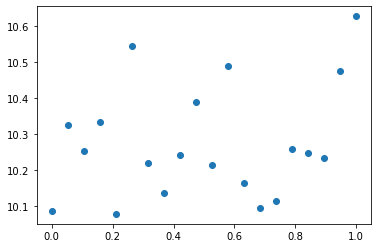

In [82]:
plt.scatter(f_arr, wt_lim)